In [45]:
#For label removing

import cv2
import os
import numpy as np

# Load the image
folder_path= "/home/souraja/ResViT/Datasets/MRI_CT/trainA"
for filename in os.listdir(folder_path):
    # Check if the file is a JPEG image
    if filename.endswith(".jpg"):
        # Create the full file path
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

# Set the coordinates of the dot
        x = 60
        y = 425

# Set the pixel value for the dot (white color)
        dot_color = (0, 0, 0)  # (B, G, R)

# Put the dot on the image array
        image[y:, x:] = dot_color
        cv2.imwrite(image_path, image)

In [2]:
#Removing background

import cv2
import numpy as np
import os

def crop_black_background(image):
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate foreground and background
    _, thresholded_image = cv2.threshold(grayscale_image, 1, 255, cv2.THRESH_BINARY)
    
    # Find contours of the foreground objects
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour (assuming it represents the pelvis structure)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Create a mask for the largest contour
    mask = np.zeros_like(grayscale_image)
    cv2.drawContours(mask, [largest_contour], 0, (255), thickness=cv2.FILLED)
    
    # Apply the mask to the original image
    cropped_image = cv2.bitwise_and(image, image, mask=mask)
    
    return cropped_image

# Folder path containing the images
folder_path = "/home/souraja/ResViT/Datasets/MRI_CT/testA"

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a JPEG image
    if filename.endswith(".jpg"):
        # Create the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Load the image
        image = cv2.imread(file_path)
        
        # Crop out black background
        cropped_image = crop_black_background(image)
        
        # Save the cropped image with the same name and location
        cv2.imwrite(file_path, cropped_image)

In [5]:
import os
import shutil

def move_files_with_keyword(source_folder, destination_folder, keyword):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Get the list of files in the source folder
    files = os.listdir(source_folder)

    # Iterate over the files
    for file in files:
        if keyword in file:
            source_path = os.path.join(source_folder, file)
            destination_path = os.path.join(destination_folder, file)
            shutil.move(source_path, destination_path)
            print(f"Moved {file} to {destination_folder}")

# Set the source folder path
source_folder = '/home/souraja/ResViT/Datasets/mixed'

# Set the destination folder path
destination_folder = '/home/souraja/ResViT/Datasets/UNet_seg/syn_MRI'

# Set the keyword to filter files
keyword = 'fake'

# Call the function to move files
move_files_with_keyword(source_folder, destination_folder, keyword)


Moved img34.13_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img44.14_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img42.5_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img24.6_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img21.14_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img35.2_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img48.14_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img17.1_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img9.9_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img23.18_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img34.2_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img7.3_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img25.11_fake_B.png to /home/souraja/ResViT/Datasets/UNet_seg/syn_MRI
Moved img32.5_fake_B.

In [ ]:
import os
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from PIL import Image

def calculate_psnr(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate PSNR
    psnr = peak_signal_noise_ratio(real_image_np, fake_image_np)

    return psnr

def calculate_ssim(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate SSIM
    ssim_score = structural_similarity(real_image_np, fake_image_np, multichannel=True)

    return ssim_score

def calculate_mse(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate MSE
    mse = np.mean((real_image_np - fake_image_np) ** 2)

    return mse

def calculate_metrics(source_folder):
    # Get a list of all files in the source folder
    files = os.listdir(source_folder)

    # Initialize empty lists to store metric values
    psnr_values = []
    ssim_values = []
    mse_values = []
    
     # Initialize variables to store highest metric values
    highest_psnr = 0.0
    highest_ssim = 0.0
    highest_mse = float('inf')
    highest_psnr_file = ''
    highest_ssim_file = ''
    highest_mse_file = ''
    
    # Iterate over the files and calculate metrics for each pair
    for file in files:
        if 'fake_B' in file:
            # Construct the corresponding real_B file path
            real_image_file = file.replace('fake_B', 'real_B')
            real_image_path = os.path.join(source_folder, real_image_file)

            # Calculate the metrics
            psnr = calculate_psnr(real_image_path, os.path.join(source_folder, file))
            ssim = calculate_ssim(real_image_path, os.path.join(source_folder, file))
            mse = calculate_mse(real_image_path, os.path.join(source_folder, file))

            # Append the metric values to the lists
            psnr_values.append(psnr)
            ssim_values.append(ssim)
            mse_values.append(mse)

    # Convert the lists to NumPy arrays for easier calculations
    psnr_values = np.array(psnr_values)
    ssim_values = np.array(ssim_values)
    mse_values = np.array(mse_values)

    # Calculate mean and standard deviation of the metrics
    mean_psnr = np.mean(psnr_values)
    std_psnr = np.std(psnr_values)
    mean_ssim = np.mean(ssim_values)
    std_ssim = np.std(ssim_values)
    mean_mse = np.mean(mse_values)
    std_mse = np.std(mse_values)
    
    # Update highest PSNR if applicable
    if psnr > highest_psnr:
        highest_psnr = psnr
        highest_psnr_file = file

            # Update highest SSIM if applicable
    if ssim > highest_ssim:
        highest_ssim = ssim
        highest_ssim_file = file

            # Update highest MSE if applicable
    if mse < highest_mse:
        highest_mse = mse
        highest_mse_file = file

    return mean_psnr, std_psnr, mean_ssim, std_ssim, mean_mse, std_mse, highest_psnr, highest_psnr_file, highest_ssim, highest_ssim_file, highest_mse, highest_mse_file

# Example usage
source_folder = '/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images'

# Calculate the mean and standard deviation of PSNR, SSIM, and MSE
mean_psnr, std_psnr, mean_ssim, std_ssim, mean_mse, std_mse, highest_psnr, highest_psnr_file, highest_ssim, highest_ssim_file, highest_mse, highest_mse_file  = calculate_metrics(source_folder)

# Print the results
print(f"Mean PSNR: {mean_psnr:.2f}")
print(f"Standard Deviation of PSNR: {std_psnr:.2f}")
print(f"Mean SSIM: {mean_ssim:.4f}")
print(f"Standard Deviation of SSIM: {std_ssim:.4f}")
print(f"Mean MSE: {mean_mse:.2f}")
print(f"Standard Deviation of MSE: {std_mse:.2f}")
print(f"Highest PSNR: {highest_psnr:.2f} (File: {highest_psnr_file})")
print(f"Highest SSIM: {highest_ssim:.4f} (File: {highest_ssim_file})")
print(f"Highest MSE: {highest_mse:.2f} (File: {highest_mse_file})")



In [4]:
import os

def find_missing_files(folder_A, folder_B):
    files_A = set(file.lower() for file in os.listdir(folder_A) if file.lower().endswith('.jpg'))
    files_B = set(file.lower() for file in os.listdir(folder_B) if file.lower().endswith('.jpg'))

    missing_files_A = files_B - files_A
    missing_files_B = files_A - files_B

    if missing_files_A:
        print("Files missing in folder A:")
        for file in missing_files_A:
            print(file)

    if missing_files_B:
        print("Files missing in folder B:")
        for file in missing_files_B:
            print(file)

# Example usage
folder_A = '/home/souraja/ResViT/Datasets/UNet_seg/syn_MRI'
folder_B = '/home/souraja/ResViT/Datasets/UNet_seg/masks'
find_missing_files(folder_A, folder_B)


Files missing in folder B:
img5.1(5.44).jpg
img3.12(3.39).jpg
img5.5(5.30).jpg
img5.2.jpg
img3.4(3.45).jpg
img7.2(7.22).jpg
img3.2.jpg
img4.2(4.12).jpg
img5.6(5.28).jpg
img5.8(5.26).jpg
img15.4.jpg
img7.11.jpg
img5.4(5.35).jpg
img3.11(3.39).jpg
img3.5(3.44).jpg
img5.7(5.27).jpg
img3.6(3.43).jpg
img7.1(7.24).jpg
img4.1(4.18).jpg
img7.4(7.19).jpg
img29.1.jpg
img23.14.jpg
img7.3(7.22).jpg


In [65]:
import os
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from PIL import Image

def calculate_psnr(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate PSNR
    psnr = peak_signal_noise_ratio(real_image_np, fake_image_np)

    return psnr

def calculate_ssim(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate SSIM
    ssim_score = structural_similarity(real_image_np, fake_image_np, multichannel=True)

    return ssim_score

def calculate_mse(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate MSE
    mse = np.mean((real_image_np - fake_image_np) ** 2)

    return mse

def calculate_metrics(source_folder):
    # Get a list of all files in the source folder
    files = os.listdir(source_folder)

    # Initialize empty lists to store metric values
    psnr_values = []
    ssim_values = []
    mse_values = []
    
     # Initialize variables to store highest metric values
    highest_psnr = 0.0
    highest_ssim = 0.0
    highest_mse = float('inf')
    highest_psnr_file = ''
    highest_ssim_file = ''
    highest_mse_file = ''
    
    # Iterate over the files and calculate metrics for each pair
    for file in files:
        if 'fake_B' in file:
            # Construct the corresponding real_B file path
            real_image_file = file.replace('fake_B', 'real_B')
            real_image_path = os.path.join(source_folder, real_image_file)

            # Calculate the metrics
            psnr = calculate_psnr(real_image_path, os.path.join(source_folder, file))
            ssim = calculate_ssim(real_image_path, os.path.join(source_folder, file))
            mse = calculate_mse(real_image_path, os.path.join(source_folder, file))

            # Append the metric values to the lists
            psnr_values.append(psnr)
            ssim_values.append(ssim)
            mse_values.append(mse)

    # Convert the lists to NumPy arrays for easier calculations
    psnr_values = np.array(psnr_values)
    ssim_values = np.array(ssim_values)
    mse_values = np.array(mse_values)

    # Calculate mean and standard deviation of the metrics
    mean_psnr = np.mean(psnr_values)
    std_psnr = np.std(psnr_values)
    mean_ssim = np.mean(ssim_values)
    std_ssim = np.std(ssim_values)
    mean_mse = np.mean(mse_values)
    std_mse = np.std(mse_values)
    
    # Update highest PSNR if applicable
    if psnr > highest_psnr:
        highest_psnr = psnr
        highest_psnr_file = file

            # Update highest SSIM if applicable
    if ssim > highest_ssim:
        highest_ssim = ssim
        highest_ssim_file = file

            # Update highest MSE if applicable
    if mse < highest_mse:
        highest_mse = mse
        highest_mse_file = file

    return mean_psnr, std_psnr, mean_ssim, std_ssim, mean_mse, std_mse, highest_psnr, highest_psnr_file, highest_ssim, highest_ssim_file, highest_mse, highest_mse_file

# Example usage
source_folder = '/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images'

# Calculate the mean and standard deviation of PSNR, SSIM, and MSE
mean_psnr, std_psnr, mean_ssim, std_ssim, mean_mse, std_mse, highest_psnr, highest_psnr_file, highest_ssim, highest_ssim_file, highest_mse, highest_mse_file  = calculate_metrics(source_folder)

# Print the results
print(f"Mean PSNR: {mean_psnr:.2f}")
print(f"Standard Deviation of PSNR: {std_psnr:.2f}")
print(f"Mean SSIM: {mean_ssim:.4f}")
print(f"Standard Deviation of SSIM: {std_ssim:.4f}")
print(f"Mean MSE: {mean_mse:.2f}")
print(f"Standard Deviation of MSE: {std_mse:.2f}")
print(f"Highest PSNR: {highest_psnr:.2f} (File: {highest_psnr_file})")
print(f"Highest SSIM: {highest_ssim:.4f} (File: {highest_ssim_file})")
print(f"Highest MSE: {highest_mse:.2f} (File: {highest_mse_file})")



/tmp/ipykernel_16672/2326221068.py:30: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = structural_similarity(real_image_np, fake_image_np, multichannel=True)


Mean PSNR: 20.92
Standard Deviation of PSNR: 2.09
Mean SSIM: 0.6682
Standard Deviation of SSIM: 0.0836
Mean MSE: 39.08
Standard Deviation of MSE: 8.82
Highest PSNR: 21.25 (File: img25.8_fake_B.png)
Highest SSIM: 0.7155 (File: img25.8_fake_B.png)
Highest MSE: 40.30 (File: img25.8_fake_B.png)


In [1]:
from PIL import Image

# Open the image
image_path = "/home/souraja/DFMIR/Dataset/deform_trainA/img1.1.jpg"
image = Image.open(image_path)

# # Get the shape of the image
# width, height, dimension = image.size

# # Print the shape
# print("Image Shape:", width, "x", height, "x", dimension)
print(image.size)


(512, 512)


In [3]:
import torch

# Your other code here...

# Empty the CUDA cache
torch.cuda.empty_cache()


In [2]:
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim

# Load the pairs of RGB images
pair1_image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit_enc_dec/test_latest/images/img15.7_fake_B.png')
pair1_image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit_enc_dec/test_latest/images/img15.7_real_B.png')
pair2_image1 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images/img15.7_real_B.png')
pair2_image2 = Image.open('/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images/img15.7_fake_B.png')

# Convert the images to grayscale arrays
pair1_array1 = np.array(pair1_image1.convert('L'))
pair1_array2 = np.array(pair1_image2.convert('L'))
pair2_array1 = np.array(pair2_image1.convert('L'))
pair2_array2 = np.array(pair2_image2.convert('L'))

# Calculate SSIM and MSE for the first pair
ssim_pair1 = ssim(pair1_array1, pair1_array2)
print(ssim_pair1)
mse_pair1 = np.mean((pair1_array1 - pair1_array2) ** 2)
print(mse_pair1)

# Calculate SSIM and MSE for the second pair
ssim_pair2 = ssim(pair2_array1, pair2_array2)
print(ssim_pair2)
mse_pair2 = np.mean((pair2_array1 - pair2_array2) ** 2)
print(mse_pair2)

# Compare the SSIM and MSE values to determine the resemblance
if ssim_pair1 > ssim_pair2 and mse_pair1 < mse_pair2:
    print("Pair 1 closely resembles each other.")
elif ssim_pair2 > ssim_pair1 and mse_pair2 < mse_pair1:
    print("Pair 2 closely resembles each other.")
else:
    print("Both pairs have a similar resemblance.")

0.7473315486016704
31.06146240234375
0.749682143050247
31.16961669921875
Both pairs have a similar resemblance.


In [4]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_ssim(img1, img2):
    return ssim(img1, img2, multichannel=True)

def calculate_l2_loss(img1, img2):
    return np.mean((img1 - img2) ** 2)

# Load the images
img1 = cv2.imread('/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images/img15.7_real_B.png')
img2 = cv2.imread('/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images/img15.7_fake_B.png')

# Convert the images to floating point representation
img1 = img1.astype(np.float64)
img2 = img2.astype(np.float64)

# Normalize the images
img1 /= 255.0
img2 /= 255.0

# Calculate PSNR
psnr = calculate_psnr(img1, img2)
print('PSNR:', psnr)

# Calculate SSIM
ssim = calculate_ssim(img1, img2)
print('SSIM:', ssim)

# Calculate L2 loss
l2_loss = calculate_l2_loss(img1, img2)
print('L2 Loss:', l2_loss)


PSNR: 69.56602618577837
SSIM: 0.7984415340699598
L2 Loss: 0.007185843297950308


/tmp/ipykernel_16672/3827118454.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return ssim(img1, img2, multichannel=True)


In [25]:
import os
import numpy as np
from PIL import Image

# Function to find colored pixel coordinates in an image
def find_colored_pixel_coordinates(image):
    img_array = np.array(image)
    colored_pixels = np.nonzero(np.any(img_array != [0, 0, 0], axis=-1))
    return list(zip(colored_pixels[0], colored_pixels[1]))

# Function to resize an image to a specific size
def resize_image(image, size):
    resized_image = image.resize(size)
    return resized_image

# Folder paths for MRI images and CT masks
mri_folder = '/home/souraja/DFMIR/deform_trainA'
ct_mask_folder = '/home/souraja/DFMIR/Dataset/trainA_label'

# Output folder for saving the modified images
output_folder = '/home/souraja/DFMIR/Dataset/resized_annotated_MRI'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get a list of image filenames in the MRI folder
mri_filenames = os.listdir(mri_folder)
mri_filenames.sort()

# Iterate over the image filenames
for filename in mri_filenames:
    # Construct the file paths for the MRI and CT mask images
    mri_path = os.path.join(mri_folder, filename)
    ct_mask_path = os.path.join(ct_mask_folder, filename)

    # Open the MRI and CT mask images
    mri_image = Image.open(mri_path)
    ct_mask_image = Image.open(ct_mask_path)

    # Resize the MRI image to match the size of the CT mask image
    mri_resized = resize_image(mri_image, ct_mask_image.size)
    print(ct_mask_image.size)

    # Convert images to numpy arrays
    mri_array = np.array(mri_resized)
    ct_mask_array = np.array(ct_mask_image)

    # Find colored pixel coordinates in the CT mask image
    colored_pixel_coords = find_colored_pixel_coordinates(ct_mask_image)

    # Replace RGB values in the MRI image at the corresponding pixel coordinates
    for coord in colored_pixel_coords:
        r, g, b = ct_mask_array[coord]
        mri_array[coord] = [r, g, b]

    # Create a PIL image from the modified numpy array
    output_image = Image.fromarray(mri_array)

    # Save the modified image in the output folder
    output_path = os.path.join(output_folder, filename)
    output_image.save(output_path)

    print("Replacement completed for", filename)

print("All images processed!")


(2000, 1500)
Replacement completed for img1.1.jpg
(2000, 1500)
Replacement completed for img1.2.jpg
(2000, 1500)
Replacement completed for img1.3.jpg
(2000, 1500)
Replacement completed for img1.4.jpg
(2000, 1500)
Replacement completed for img1.5.jpg
(2000, 1500)
Replacement completed for img1.6.jpg
(2000, 1500)
Replacement completed for img1.7.jpg
(2000, 1500)
Replacement completed for img1.8.jpg
(2000, 1500)
Replacement completed for img1.9.jpg
(720, 540)
Replacement completed for img10.1.jpg
(720, 540)
Replacement completed for img10.2.jpg
(720, 540)
Replacement completed for img10.3.jpg
(720, 540)
Replacement completed for img11.1.jpg
(720, 540)
Replacement completed for img11.10.jpg
(720, 540)
Replacement completed for img11.11.jpg
(720, 540)
Replacement completed for img11.12.jpg
(720, 540)
Replacement completed for img11.13.jpg
(720, 540)
Replacement completed for img11.14.jpg
(720, 540)
Replacement completed for img11.15.jpg
(720, 540)
Replacement completed for img11.16.jpg
(720

Replacement completed for img26.1.jpg
(720, 540)
Replacement completed for img26.2.jpg
(720, 540)
Replacement completed for img26.3.jpg
(720, 540)
Replacement completed for img26.4.jpg
(720, 540)
Replacement completed for img27.1.jpg
(720, 540)
Replacement completed for img27.10.jpg
(720, 540)
Replacement completed for img27.11.jpg
(720, 540)
Replacement completed for img27.12.jpg
(720, 540)
Replacement completed for img27.2.jpg
(720, 540)
Replacement completed for img27.3.jpg
(720, 540)
Replacement completed for img27.4.jpg
(720, 540)
Replacement completed for img27.5.jpg
(720, 540)
Replacement completed for img27.6.jpg
(720, 540)
Replacement completed for img27.7.jpg
(720, 540)
Replacement completed for img27.8.jpg
(720, 540)
Replacement completed for img27.9.jpg
(720, 540)
Replacement completed for img28.1.jpg
(720, 540)
Replacement completed for img28.10.jpg
(720, 540)
Replacement completed for img28.11.jpg
(720, 540)
Replacement completed for img28.12.jpg
(720, 540)
Replacement co

(720, 540)
Replacement completed for img39.10.jpg
(720, 540)
Replacement completed for img39.11.jpg
(720, 540)
Replacement completed for img39.12.jpg
(720, 540)
Replacement completed for img39.13.jpg
(720, 540)
Replacement completed for img39.14.jpg
(720, 540)
Replacement completed for img39.15.jpg
(720, 540)
Replacement completed for img39.2.jpg
(720, 540)
Replacement completed for img39.3.jpg
(720, 540)
Replacement completed for img39.4.jpg
(720, 540)
Replacement completed for img39.5.jpg
(720, 540)
Replacement completed for img39.6.jpg
(720, 540)
Replacement completed for img39.7.jpg
(720, 540)
Replacement completed for img39.8.jpg
(720, 540)
Replacement completed for img39.9.jpg
(2000, 1500)
Replacement completed for img4.1.jpg
(2000, 1500)
Replacement completed for img4.2.jpg
(2000, 1500)
Replacement completed for img4.3.jpg
(2000, 1500)
Replacement completed for img4.4.jpg
(2000, 1500)
Replacement completed for img4.5.jpg
(2000, 1500)
Replacement completed for img4.6.jpg
(720, 54

(720, 540)
Replacement completed for img53.21.jpg
(720, 540)
Replacement completed for img53.22.jpg
(720, 540)
Replacement completed for img53.3.jpg
(720, 540)
Replacement completed for img53.4.jpg
(720, 540)
Replacement completed for img53.5.jpg
(720, 540)
Replacement completed for img53.6.jpg
(720, 540)
Replacement completed for img53.7.jpg
(720, 540)
Replacement completed for img53.8.jpg
(720, 540)
Replacement completed for img53.9.jpg
(720, 540)
Replacement completed for img54.1.jpg
(720, 540)
Replacement completed for img54.10.jpg
(720, 540)
Replacement completed for img54.11.jpg
(720, 540)
Replacement completed for img54.12.jpg
(720, 540)
Replacement completed for img54.13.jpg
(720, 540)
Replacement completed for img54.14.jpg
(720, 540)
Replacement completed for img54.15.jpg
(720, 540)
Replacement completed for img54.16.jpg
(720, 540)
Replacement completed for img54.17.jpg
(720, 540)
Replacement completed for img54.18.jpg
(720, 540)
Replacement completed for img54.19.jpg
(720, 54

In [26]:
import os
from PIL import Image

mri_folder='/home/souraja/DFMIR/Dataset/testB'
reference_folder='/home/souraja/DFMIR/Dataset/resized_annotated_MRI'
output_folder='/home/souraja/DFMIR/Dataset/resized_orig_MRI'
mri_filenames=os.listdir(mri_folder)
mri_filenames.sort()


for filename in mri_filenames:
    mri_path=os.path.join(mri_folder,filename)
    reference_path=os.path.join(reference_folder, filename)
    output_path=os.path.join(output_folder,filename)
    mri_image=Image.open(mri_path)
    ref_image=Image.open(reference_path)
    mri_image=mri_image.resize(ref_image.size)
    mri_image.save(output_path)
    print(mri_path, mri_image.size)


/home/souraja/DFMIR/Dataset/testB/img1.1.jpg (2000, 1500)
/home/souraja/DFMIR/Dataset/testB/img1.2.jpg (2000, 1500)
/home/souraja/DFMIR/Dataset/testB/img1.3.jpg (2000, 1500)
/home/souraja/DFMIR/Dataset/testB/img1.4.jpg (2000, 1500)
/home/souraja/DFMIR/Dataset/testB/img1.5.jpg (2000, 1500)
/home/souraja/DFMIR/Dataset/testB/img1.6.jpg (2000, 1500)
/home/souraja/DFMIR/Dataset/testB/img1.7.jpg (2000, 1500)
/home/souraja/DFMIR/Dataset/testB/img1.8.jpg (2000, 1500)
/home/souraja/DFMIR/Dataset/testB/img1.9.jpg (2000, 1500)
/home/souraja/DFMIR/Dataset/testB/img10.1.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img10.2.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img10.3.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img11.1.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img11.10.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img11.11.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img11.12.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img11.13.jpg (720, 540)
/home/souraja/DFMI

/home/souraja/DFMIR/Dataset/testB/img24.27.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img24.3.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img24.4.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img24.5.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img24.6.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img24.7.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img24.8.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img24.9.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img25.1.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img25.10.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img25.11.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img25.12.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img25.2.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img25.3.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img25.4.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img25.5.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img25.6.jpg (720, 540)
/home/souraja/DFMIR/Dataset

/home/souraja/DFMIR/Dataset/testB/img36.19.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.2.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.20.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.21.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.22.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.23.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.24.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.25.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.3.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.4.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.5.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.6.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.7.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.8.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img36.9.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img37.1.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img37.10.jpg (720, 540)
/home/souraja/DFMIR/Dat

/home/souraja/DFMIR/Dataset/testB/img47.13.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.14.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.15.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.16.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.2.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.3.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.4.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.5.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.6.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.7.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.8.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img47.9.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img48.1.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img48.10.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img48.11.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img48.12.jpg (720, 540)
/home/souraja/DFMIR/Dataset/testB/img48.13.jpg (720, 540)
/home/souraja/DFMIR/Dat

In [33]:
import os
from PIL import Image

mri_folder='/home/souraja/ResViT/Datasets/UNet_seg/masks'
output_folder='/home/souraja/ResViT/Datasets/UNet_seg/resized_masks'
mri_filenames=os.listdir(mri_folder)
mri_filenames.sort()
size=(720, 540)


for filename in mri_filenames:
    mri_path=os.path.join(mri_folder,filename)
    output_path=os.path.join(output_folder,filename)
    mri_image=Image.open(mri_path)
    mri_image=mri_image.resize(size)
    mri_image.save(output_path)
    print(mri_path, mri_image.size)


/home/souraja/ResViT/Datasets/UNet_seg/masks/img1.1.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img1.2.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img1.3.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img1.4.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img1.5.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img1.6.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img1.7.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img1.8.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img1.9.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img10.1.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img10.2.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img10.3.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img11.1.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img11.10.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img11.11.jp

/home/souraja/ResViT/Datasets/UNet_seg/masks/img25.3.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img25.4.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img25.5.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img25.6.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img25.7.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img25.8.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img25.9.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img26.1.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img26.2.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img26.3.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img26.4.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img27.1.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img27.10.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img27.11.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/i

/home/souraja/ResViT/Datasets/UNet_seg/masks/img34.7.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img34.8.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img34.9.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img35.1.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img35.2.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img35.3.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img35.4.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img36.1.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img36.10.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img36.11.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img36.12.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img36.13.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img36.14.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img36.15.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/mas

/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.14.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.15.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.2.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.3.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.4.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.5.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.6.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.7.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.8.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img45.9.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img46.1.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img46.10.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img46.11.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img46.12.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/mask

/home/souraja/ResViT/Datasets/UNet_seg/masks/img9.7.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img9.8.jpg (720, 540)
/home/souraja/ResViT/Datasets/UNet_seg/masks/img9.9.jpg (720, 540)


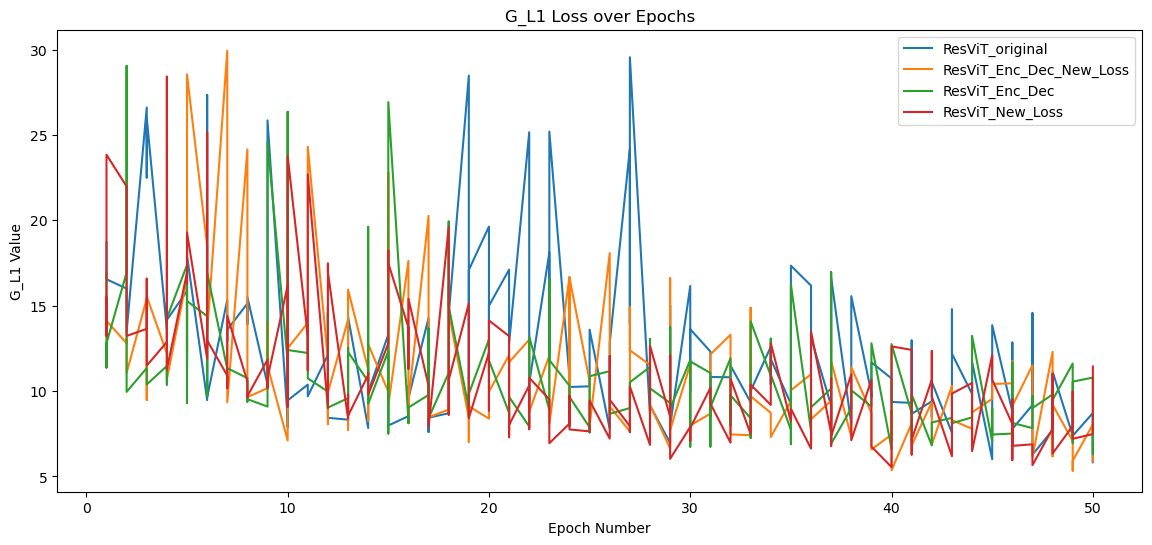

In [49]:
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    g_l1_values = []

    with open(log_file, 'r') as file:
        for line in file:
            if line.startswith('('):
                parts = line.split()
                epoch_number = int(parts[1].strip(','))
                g_l1_value = float(parts[11])
                
                epoch_numbers.append(epoch_number)
                g_l1_values.append(g_l1_value)

    return epoch_numbers, g_l1_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(14, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, g_l1_values = parse_loss_log(loss_log)
        plt.plot(epoch_numbers, g_l1_values, label=labels[i])

    plt.xlabel('Epoch Number')
    plt.ylabel('G_L1 Value')
    plt.title('G_L1 Loss over Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_less_orig/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_less_enc_dec_new_loss/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_less_enc_dec/loss_log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_less_new_ls/loss_log.txt',
]   

# Provide the labels for the loss logs
labels = [
    'ResViT_original',
    'ResViT_Enc_Dec_New_Loss',
    'ResViT_Enc_Dec',
    'ResViT_New_Loss',
    
]

plot_loss_graph(loss_logs, labels)


In [39]:
import os
import cv2

def denoise_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the image
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)

            # Perform denoising on the image (adjust parameters as needed)
            denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

            # Save the denoised image
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, denoised_image)

            print(f"Denoised image saved: {output_path}")

# Specify the input folder containing the CT images
input_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainB'

# Specify the output folder where the denoised images will be saved
output_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised'

# Perform denoising on the images in the input folder
denoise_images(input_folder, output_folder)


Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200057.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.1300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000009.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP13.3200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.4700001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.1700001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2600013.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.3500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.5100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.6000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP8

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3400062.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.2500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2200014.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2600019.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900016.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2.2600001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300033.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000049.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3.6800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3800054.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP7.3900001.jpg
D

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2400033.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP53.3500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300044.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4000045.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2100021.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3.700001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.4900001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4.2000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000010.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP9.3800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3500035.jpg

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4800003.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3900019.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4.2700001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4800012.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2200006.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2200026.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3400025.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2800025.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600015.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.5300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000004.jpg
Denoi

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2400014.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4100061.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4500063.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2500062.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2200035.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2200020.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.3400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1.6200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3600048.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2100050.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2000010.jpg
Denoi

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4100015.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3300025.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2600010.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900035.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.3000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP49.100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.2600001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP8.3300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3400010.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1400047.jpg

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP13.3600001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP49.300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP13.2900001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4100020.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2800017.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2500025.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4500019.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4700022.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000056.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2000024.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.1700001.jpg


Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3500029.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2.5600001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2800053.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1700062.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1900008.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1700035.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300002.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3300021.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3100017.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2500004.jpg
Denoised

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3800027.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2500042.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.2300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1700053.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP7.1100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3300028.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3800050.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600051.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.2900001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2400065.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3500021.jpg
De

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000025.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1900018.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3400028.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900042.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1700016.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3.4300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2600060.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3600015.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.2800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2600022.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200008.jpg
Denois

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.4800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP9.3000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1700024.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900013.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1800010.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.4300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2700059.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3900046.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300009.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3100061.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.2400001.jpg

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3600043.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600011.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600003.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200048.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3700054.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3400041.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3300005.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP49.5700001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.5800001.jpg
De

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP49.5600001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4800059.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP13.5400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600009.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.5600001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.3300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3500017.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4700031.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1500044.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.2200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000029.

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4700033.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000059.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3.400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3600056.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.5400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3800018.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4800041.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4000009.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2100011.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600025.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3700033.jpg
Denois

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3300009.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4400045.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2700054.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1.6100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.6200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.3200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4400050.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2600034.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600046.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2200034.jpg
D

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000048.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3300065.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4700058.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP49.4000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900031.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2500027.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.6000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900037.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4000043.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.5000001.jpg
D

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2500019.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2600023.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2100016.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2200046.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3800042.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1400014.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP13.5800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3800053.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4800027.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3.2100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.1400001.jpg
De

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2500029.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP53.5100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2800057.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1500060.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900049.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4400019.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600014.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2100013.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4200010.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.5600001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.4800001.jpg
D

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200017.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900039.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2.2000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4800029.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3400056.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4.1100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP8.1200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3500056.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP7.2000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.1800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200063.jpg


Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3300069.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4.800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4500052.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2100057.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4200040.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4100053.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900046.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4700050.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3500027.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP13.4400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3800019.jpg
Denois

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4200032.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.2000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3700023.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP13.2500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600039.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP52.3000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1.4800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3500065.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.1100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP53.3000

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4100004.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2.300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1400046.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2700004.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP9.5000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3.5000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2800033.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000016.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP9.6400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600016.jpg
Den

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.2100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP49.400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.1100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.6100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200035.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1400060.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3900003.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP9.200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4100003.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900022.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4700034.jp

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300054.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4500065.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1400034.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1.4100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900055.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2400058.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3300037.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP8.3700001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2200007.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2700002.jpg
Deno

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600021.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3.1800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000008.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1.4400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.4700001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200033.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2100040.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200058.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4400003.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3700060.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP52.4900001.jpg
D

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP13.4500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP9.3900001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4500041.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP52.3500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4200063.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300026.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4200064.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900011.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP9.3600001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2400006.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.2900001.jp

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2700039.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.900001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4400013.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2800063.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1.900001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300010.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3600026.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4700012.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP53.4700001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2200051.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1.400001.jpg
Den

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1.2500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600004.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1400008.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP8.5200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4200058.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300029.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3600037.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP9.3200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3900036.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP8.4100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4.200001.jpg
D

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3100043.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP54.2800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2.400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3600039.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP11.300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1900002.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3400054.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.3200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3400029.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1400012.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1700025.jpg
De

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.3000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3.4000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP49.4800001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1700063.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4000055.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3400008.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3.5500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3700065.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4400056.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300052.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1700033.jpg
D

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2700023.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP8.3000001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.6400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP5.4100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3800034.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1.2900001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3900052.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4700051.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP49.2300001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200028.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP49.2200001

Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3100034.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP13.3700001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4500061.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3200052.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4600043.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP1500020.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP52.1100001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4500001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP10.2400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2400040.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4.100001.jpg


Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2400026.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3800015.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4800057.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000032.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2900051.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP52.5400001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3300063.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP52.4200001.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP2300025.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP3000031.jpg
Denoised image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainB_denoised/CTP4000030.jpg
Deno

In [40]:
import os
import cv2
import numpy as np

def normalize_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over the images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the image
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)

            # Normalize the pixel values to [0, 1]
            normalized_image = image.astype(np.float32) / 255.0

            # Save the normalized image
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, normalized_image * 255.0)

            print(f"Normalized image saved: {output_path}")

# Specify the input folder containing the RGB images
input_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainA_orig'

# Specify the output folder where the normalized images will be saved
output_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainA_norm'

# Normalize the images in the input folder and save them to the output folder
normalize_images(input_folder, output_folder)


Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3200057.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP54.1300001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3000009.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP13.3200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP54.4700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP11.1700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2600013.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP10.3500001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP54.5100001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP10.6000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP8.2400001.jpg
Normalize

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.5700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2600058.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3300046.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP13.5100001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4600061.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3400032.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2100010.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.3600001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP8.2200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP52.2900001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700042.jpg
Normalized image sav

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP49.4900001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP54.5500001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP54.3200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2000021.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.1000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1700044.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500057.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500045.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.2600001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4500022.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP13.1400001.jpg
Normalized image

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2400012.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500023.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4400032.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200036.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1500065.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.5700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP49.5000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2600054.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.1500001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2300022.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1400016.jpg
Normalized image saved: /

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2300049.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700055.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200011.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP54.4200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4100031.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700008.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1700020.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200028.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.2100001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2600005.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3400002.jpg
Normalized image saved: /ho

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2800051.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3300056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900054.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP49.4700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3300064.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2400027.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3400037.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1500057.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3000038.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP7.3400001.jpg
Normalized image saved: /ho

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1700062.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1400001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1900008.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1700035.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2300002.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3300021.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3100017.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500004.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4600041.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4400048.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3400001.jpg
Normalized image saved: /home/so

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200012.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP5.4000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500034.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700059.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700055.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4100038.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500031.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3700061.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1900013.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500012.jpg
Normalized image saved: /home/

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200017.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700006.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1900005.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3300052.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4000053.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.5500001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3800057.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200037.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP9.700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4500054.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1500062.jpg
Normalized image saved: /home

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200015.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900042.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200062.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2800030.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP49.800001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900064.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4100006.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4600023.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2600016.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3700028.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900011.jpg
Normalized image saved: /home/

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4600040.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP7.2700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP5.600001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3100016.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3600042.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1.1000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP5.5900001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3300058.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1.1100001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700022.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.6500001.jpg
Normalized image save

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4000020.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500011.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1.800001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP8.4600001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4800050.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP9.2800001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.2800001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200002.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700029.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4100013.jpg
Normalized image saved: /

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1.6100001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP10.6200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP10.3200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4400050.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2600034.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4600046.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP5.500001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200034.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4800054.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700043.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1.3300001.jpg
Normalized image save

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4400028.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4500028.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3800021.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2300012.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500024.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4500062.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1400040.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3800022.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900013.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500043.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP11.3400001.jpg
Normalized image saved: /home

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP52.4000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500002.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2900030.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.500001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2900056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500038.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1500033.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700021.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700054.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3700032.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.6100001.jpg
Normalized image saved: /h

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3300050.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.4900001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700021.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3000027.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2800009.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700007.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200033.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1.6400001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.6200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2800004.jpg
Normalized image saved: /h

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3100037.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.2200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500049.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4000056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4000061.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP9.4300001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3700021.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200018.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2100060.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4800053.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2400037.jpg
Normalized image saved: /hom

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500025.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3200050.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500031.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP13.1900001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500063.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200049.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2400069.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1500036.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4800039.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200032.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP54.2000001.jpg
Normalized image saved: /h

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP9.5000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.5000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2800033.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3000016.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP9.6400001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4600016.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP8.4700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP54.1600001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4800036.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3200065.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1500040.jpg
Normalized image save

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3300013.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2000017.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP53.1500001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500033.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3800056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200013.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500065.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900012.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2400023.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP49.3500001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2400057.jpg
Normalized image saved: /h

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4100007.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500039.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.7400001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1500006.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4300013.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP53.4400001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4500059.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2100064.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1400061.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP9.1000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200056.jpg
Normalized image saved: /

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP5.3800001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3700064.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2300061.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900031.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4.700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4800005.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900057.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1400056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700006.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3400022.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP8.2500001.jpg
Normalized image saved: /ho

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4600017.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP9.1400001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200065.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2100062.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2300062.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700035.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3100040.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1.1700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2400039.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2800034.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3.1400001.jpg
Normalized image saved: /h

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200011.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700066.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP13.4900001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP8.1300001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP8.4000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900014.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.4300001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700031.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.3200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3300043.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2600012.jpg
Normalized image save

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.400001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3600039.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP11.300001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1900002.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3400054.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP5.3200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3400029.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1400012.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1700025.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700047.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4200002.jpg
Normalized image saved: /ho

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3700010.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1.4300001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1400032.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2500058.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3400006.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2100005.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3200046.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4600056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1.1300001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP52.2200001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1900009.jpg
Normalized image saved: /

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200008.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3700053.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3500036.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2800007.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200065.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4100050.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2400059.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP54.4000001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP7.1700001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2200038.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4700017.jpg
Normalized image saved: /ho

Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2700041.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3600034.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP10.4400001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2900052.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900035.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP2.5400001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4.1800001.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP1400009.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3900056.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP3800002.jpg
Normalized image saved: /home/souraja/ResViT/Datasets/MRI_CT/trainA_norm/CTP4800033.jpg
Normalized image saved: /

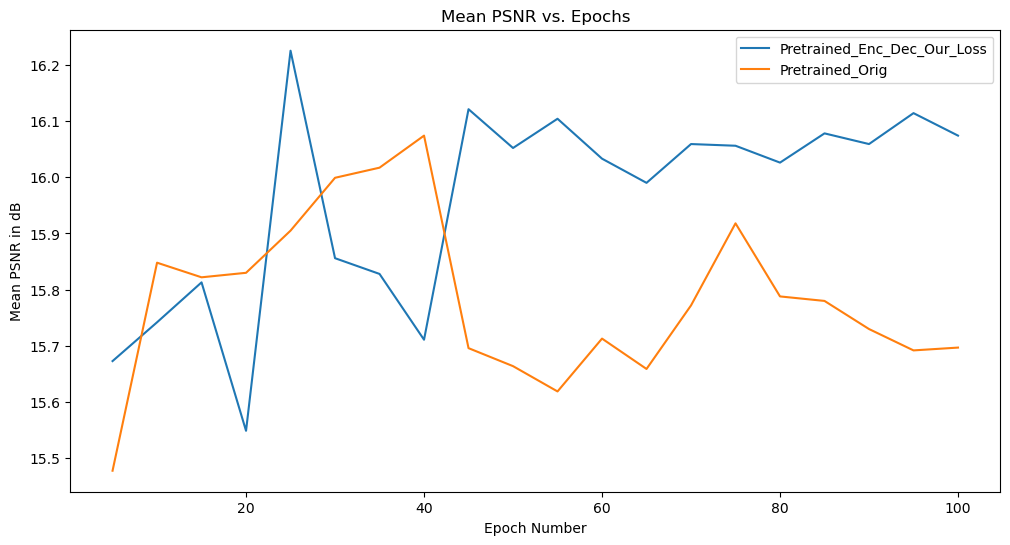

In [62]:
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    g_l1_values = []

    with open(log_file, 'r') as file:
        for line in file:
            if line.startswith('E'):
                parts = line.split()
                #print(parts[5])
                epoch_number = int(parts[1].strip(','))
                g_l1_value = float(parts[5])
                
                epoch_numbers.append(epoch_number)
                g_l1_values.append(g_l1_value)

    return epoch_numbers, g_l1_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, g_l1_values = parse_loss_log(loss_log)
        plt.plot(epoch_numbers, g_l1_values, label=labels[i])

    plt.xlabel('Epoch Number')
    plt.ylabel('Mean PSNR in dB')
    plt.title('Mean PSNR vs. Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    
    '/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_new_ls_enc_dec/log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_orig/log.txt',
]   

# Provide the labels for the loss logs
labels = [
    
    'Pretrained_Enc_Dec_Our_Loss',
    'Pretrained_Orig',

]

plot_loss_graph(loss_logs, labels)


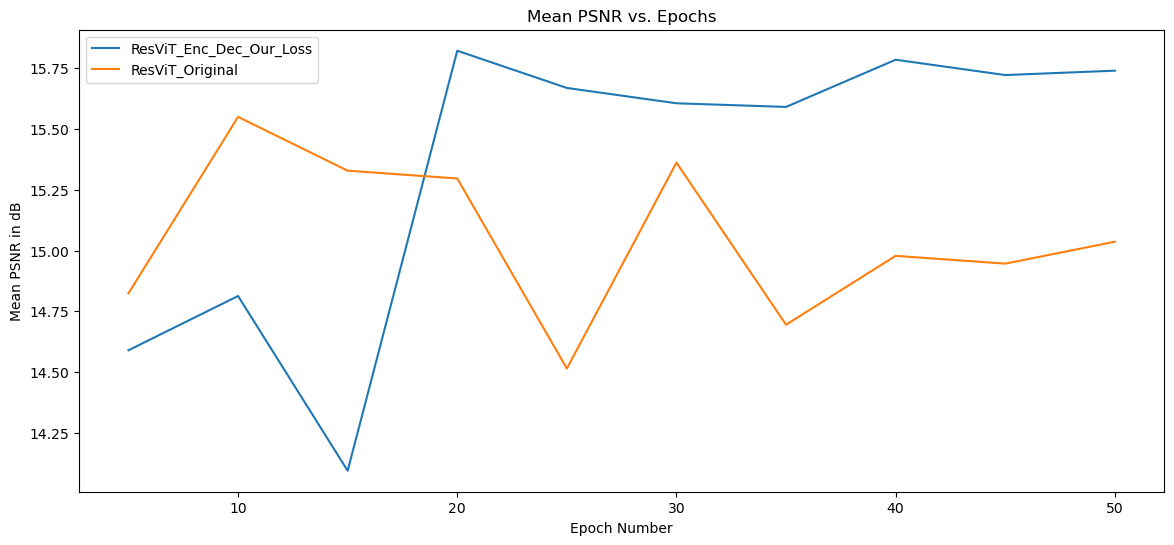

In [61]:
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    g_l1_values = []

    with open(log_file, 'r') as file:
        for line in file:
            if line.startswith('E'):
                parts = line.split()
                epoch_number = int(parts[1].strip(','))
                g_l1_value = float(parts[5])
                
                epoch_numbers.append(epoch_number)
                g_l1_values.append(g_l1_value)

    return epoch_numbers, g_l1_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(14, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, g_l1_values = parse_loss_log(loss_log)
        plt.plot(epoch_numbers, g_l1_values, label=labels[i])

    plt.xlabel('Epoch Number')
    plt.ylabel('Mean PSNR in dB')
    plt.title('Mean PSNR vs. Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_new_ls_enc_dec/log.txt',
    '/home/souraja/ResViT/checkpoints/CT_MRI_resvit_orig/log.txt',
]   

# Provide the labels for the loss logs
labels = [
    'ResViT_Enc_Dec_Our_Loss',
    'ResViT_Original',
    
]

plot_loss_graph(loss_logs, labels)


In [70]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    max_value = np.max(img1)
    psnr = 20 * np.log10(max_value / np.sqrt(mse))
    return psnr

def calculate_ssim(img1, img2):
    return ssim(img1, img2, multichannel=True)

def calculate_l2_loss(img1, img2):
    return np.mean((img1 - img2) ** 2)

def compare_image_pairs(filepaths):
    for i, (filepath1, filepath2) in enumerate(filepaths):
        # Read the images
        img1 = cv2.imread(filepath1)
        img2 = cv2.imread(filepath2)

        # Convert BGR to RGB
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

        # Calculate metrics
        psnr = calculate_psnr(img1, img2)
        ssim_value = calculate_ssim(img1, img2)
        l2_loss = calculate_l2_loss(img1, img2)

        # Print the metrics
        print(f"Pair {i+1}:")
        print(f"PSNR: {psnr}")
        print(f"SSIM: {ssim_value}")
        print(f"L2 Loss: {l2_loss}")
        print()

# Provide the filepaths of the image pairs
filepaths = [
    ('/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images/img45.2_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images/img45.2_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img45.2_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img45.2_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img15.7_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img15.7_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img43.22_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img43.22_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img45.8_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img45.8_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img34.2_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img34.2_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img14.6_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img14.6_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img15.10_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img15.10_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img15.7_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img15.7_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img43.22_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img43.22_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img45.8_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img45.8_real_B.png'),
    ('/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img34.2_fake_B.png', '/home/souraja/ResViT/results/CT_MRI_resvit_orig/test_latest/images/img34.2_real_B.png'),
]

compare_image_pairs(filepaths)


Pair 1:
PSNR: 29.939815878938166
SSIM: 0.5988029866432333
L2 Loss: 43.028167724609375

Pair 2:
PSNR: 29.393197936062172
SSIM: 0.6045704661773785
L2 Loss: 43.72697448730469

Pair 3:
PSNR: 32.59180462022133
SSIM: 0.7378040695176913
L2 Loss: 31.449615478515625

Pair 4:
PSNR: 31.913796478169697
SSIM: 0.7598627742056349
L2 Loss: 31.719497680664062

Pair 5:
PSNR: 30.578092386007874
SSIM: 0.6354548883318312
L2 Loss: 41.60099792480469

Pair 6:
PSNR: 31.616323157846445
SSIM: 0.7225266535986439
L2 Loss: 34.58308410644531

Pair 7:
PSNR: 32.048821635352446
SSIM: 0.6809173480290869
L2 Loss: 35.340423583984375

Pair 8:
PSNR: 32.50640757188553
SSIM: 0.7392644474064308
L2 Loss: 31.27398681640625

Pair 9:
PSNR: 32.59180462022133
SSIM: 0.7378040695176913
L2 Loss: 31.449615478515625

Pair 10:
PSNR: 31.913796478169697
SSIM: 0.7598627742056349
L2 Loss: 31.719497680664062

Pair 11:
PSNR: 30.578092386007874
SSIM: 0.6354548883318312
L2 Loss: 41.60099792480469

Pair 12:
PSNR: 31.616323157846445
SSIM: 0.7225266

/tmp/ipykernel_16672/3148806147.py:12: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return ssim(img1, img2, multichannel=True)
